## IMDB 电影评价

从该案例开始引入序列数据的回归及分类问题，这是作为自然语言处理NLP的先导部分

作为刚开始学习的人而言，不建议一上来就接触真实地由字符组成的序列，因为这些序列会引入编码问题，容易吓退很多初学者。  

我希望你们在Quick Start阶段不要被NLP和有序序列吓到，把它当作简单的分类和回归问题看即可。  
实际上Keras直接加载这些IMDB数据给你返回的x_train,x_test是一系列数字构成的向量，而y_train,y_test是0和1构成的向量。  

在后期NLP文件夹下将使用真实语句进行处理。

In [1]:
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

import numpy as np
import matplotlib.pyplot as plt

## 载入数据

In [2]:
(x_train, y_train), (_, _) = imdb.load_data()

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
c:\users\lucks\.conda\envs\lucks\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
c:\users\lucks\.conda\envs\lucks\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do

初学可以忽略这些警告

#### 获得字符串中最大值

In [3]:
vocabulary_size = -1

for seq in x_train:
    max_index = max(seq)
    if max_index > vocabulary_size:
        vocabulary_size = max_index

vocabulary_size += 1      # 这里记住一定要+1，因为需要给编码成0的字符留一个位置

max_len = 200             # 只选择前300个字符作为这句话

该数据集中出现了88325种字符，所有评论最短的有11个字符，最长的有2494个字符

用这种方式载入数据集可以直接获得字典化好的向量，这对初学者而言很友好。目前先忽略警告  

但一定要有一个概念：这样的载入方式在NLP处理种是非常粗糙的，这里只是为了引入和教学

In [4]:
x_train = sequence.pad_sequences(x_train, maxlen=max_len)

## 构建模型

尽管有很多博客在处理序列数据的时候直接使用Embedding函数，然后在函数内部的input_length参数中定义输入序列的长度。  

但是，我对所有人的要求是输入层必须明确到Input上，这样做有如下几个优点：
* 1.可以让读者快速了解输入的形状，提升代码的可读性。
* 2.能够应对输入共享。

In [5]:
input_layer = Input(shape=(max_len))
embedding_layer = Embedding(output_dim=300, input_dim=vocabulary_size)(input_layer)
conv_1 = Conv1D(64, 3, activation='relu')(embedding_layer)
maxpool_1 = MaxPooling1D()(conv_1)
flatten = Flatten()(maxpool_1)
dense_1 = Dense(32, activation='relu')(flatten)
dense_2 = Dense(1, activation='sigmoid')(dense_1)

* Embedding: 这个操作在MLP中很常见，目前只需要知道如何使用即可
* Conv1D:    图像卷积使用的是Conv2D，那么对于一个序列而言其卷积应该是Conv1D  

后面的操作目前和图像处理的一致

In [6]:
model = Model(inputs=input_layer, outputs=dense_2)

## 编译模型

In [7]:
model.compile(loss='binary_crossentropy', metrics='accuracy', optimizer='rmsprop')

## 训练

In [8]:
model.fit(x_train, y_train, epochs=5, verbose=1, batch_size=512)

Epoch 1/5
49/49 [==============================] - 10s 178ms/step - loss: 0.6626 - accuracy: 0.5650
Epoch 2/5
49/49 [==============================] - 9s 183ms/step - loss: 0.2890 - accuracy: 0.8840
Epoch 3/5
49/49 [==============================] - 8s 161ms/step - loss: 0.1578 - accuracy: 0.9422
Epoch 4/5
49/49 [==============================] - 8s 161ms/step - loss: 0.0956 - accuracy: 0.9678
Epoch 5/5
49/49 [==============================] - 8s 160ms/step - loss: 0.0643 - accuracy: 0.9783


看吧，自然语言处理也没有那么吓人，整体流程和图像网络没有多大差别。  

我不喜欢一开始就将词编码、Embedding、词向量这些概念拿出来秀技术，用一堆色彩丰富的图来描绘这些操作。  

事实上，大多数情况下的神经网络都没有想象中那么离奇，有很多人学完图像处理就卡在了NLP上，实际上两者的差距主要集中在预处理阶段。  

路漫漫其修远兮，吾将上下而求索，望诸君共勉

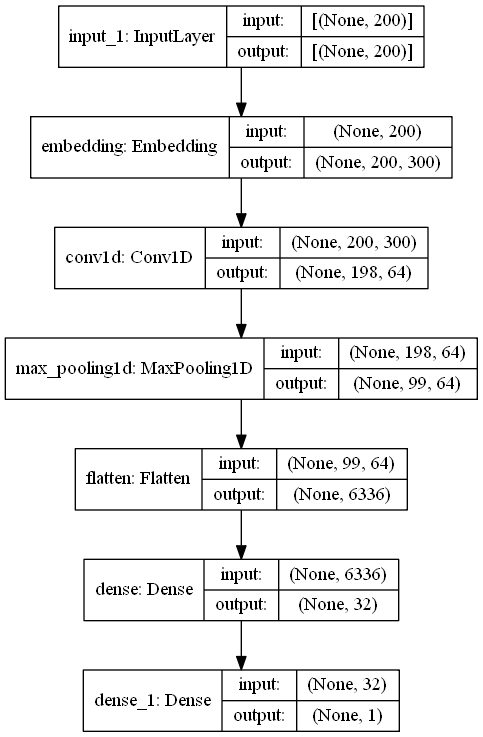

In [9]:
plot_model(model, show_shapes=True)